In [10]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Audio
from scipy.io.wavfile import write

In [2]:
def write_border(array, value):
    array[-1, :] = value
    array[:, -1] = value
    return array

In [91]:
duration = 2

n = 128
listening_point = (64, 64)
excitement_point = (32, 32)

size = 0.3
speed_of_sound = 343

dampening_per_second = 0.9999
spring_strength = 0.5 # 1 seems to be the best

sample_rate = 48000 # int(speed_of_sound / (size / n))
dampening_per_sample = 1 - pow(1 - dampening_per_second, 1 / sample_rate)

sample_rate

48000

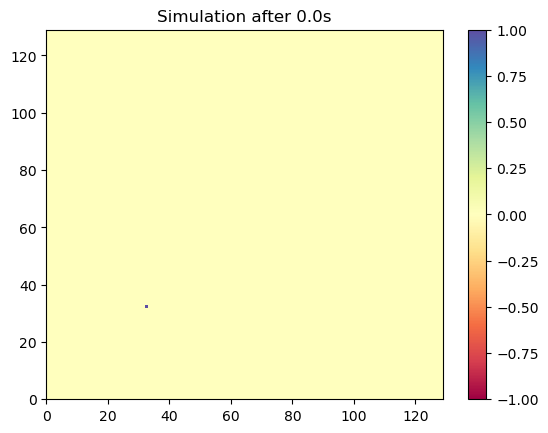

/var/folders/f3/1sgbb1cx14j4h3y6pg_kjtlw0000gn/T/ipykernel_36681/2630220193.py:19: RuntimeWarning: invalid value encountered in add
  speeds += np.sum((other_deflections - deflections) * spring_strength * other_masses / (masses + other_masses), axis=0)
/var/folders/f3/1sgbb1cx14j4h3y6pg_kjtlw0000gn/T/ipykernel_36681/2630220193.py:19: RuntimeWarning: invalid value encountered in subtract
  speeds += np.sum((other_deflections - deflections) * spring_strength * other_masses / (masses + other_masses), axis=0)


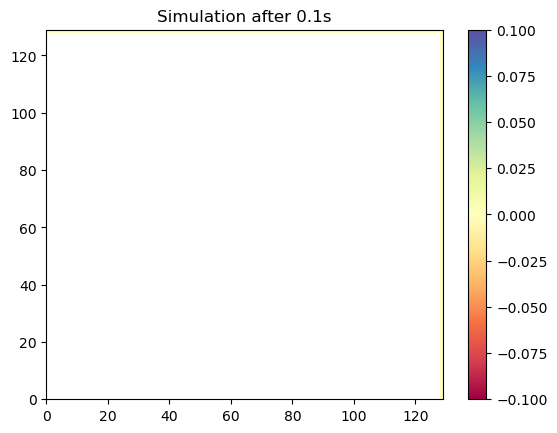

KeyboardInterrupt: 

In [92]:
num_simulated_steps = duration * sample_rate

masses = write_border(np.ones((n+1, n+1)), 1)
deflections = np.zeros((n+1, n+1))
speeds = np.zeros((n+1, n+1))
speeds[excitement_point] = 1

springs = np.array([(1, 0), (0, 1), (-1, 0), (0, -1), (2, 0), (0, 2), (-2, 0), (0, -2), (1, 1), (1, -1), (-1, 1), (-1, -1)])

audio = np.empty(num_simulated_steps)

# Pre-calculate neighbor indices for vectorization
ix, iy = np.indices(deflections.shape)

for sample in range(num_simulated_steps):    
    other_deflections = np.array([np.roll(deflections, spring, axis=(0, 1)) for spring in springs])
    other_masses = np.array([np.roll(masses, spring, axis=(0, 1)) for spring in springs])

    speeds += np.sum((other_deflections - deflections) * spring_strength * other_masses / (masses + other_masses), axis=0)
    speeds = write_border(speeds, 0)

    deflections += speeds
    deflections = write_border(deflections, 0)
    
    speeds *= 1 - dampening_per_sample / masses

    # Update the audio array
    audio[sample] = deflections[listening_point]

    # Reduce plotting frequency for performance
    
    if sample % (sample_rate // 10) == 0:
        scale = np.max(np.abs(deflections))
        plt.pcolormesh(deflections, vmin=-scale, vmax=scale, cmap='Spectral')
        plt.colorbar()
        plt.title(f"Simulation after {round(sample/sample_rate, 2) }s")
        plt.show()


In [ ]:
write(f'{spring_strength}_spring_{sample_rate}_sample_rate_{dampening_per_second}_dampening.wav', sample_rate, np.round(audio * 32767).astype(np.int16))
Audio(audio, rate=sample_rate, normalize=False)

In [35]:
springs = [(1, 0), (0, 1), (-1, 0), (0, -1)]
[get(masses, spring) * get(deflections, spring) for spring in springs]

[0.0, 0.0, 0, 0]

In [29]:
get(masses, (1, 0)) * get(deflections, (1, 0))

0.0

In [34]:
for spring in springs: print(get(masses, spring))

[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1.]]
[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1

In [111]:
test = np.array([[1, 2, 3], [4, 5, 6]])


indices = np.indices(test.shape)


print(test[indices])

IndexError: index 2 is out of bounds for axis 0 with size 2